# Author: Minhaj Uddin Meraj
# TASK 2: Prediction using Unsupervised ML
From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

# Unsupervised Machine Learning
Unsupervised Machine Learning is a technique to discover patterns and information that was previously undetected. Unlike supervised learning, users do not need to supervise the model. Unsupervised Machine Learning Algorithms are: clusterning, neural network etc.

Clustering is an unsupervised method of machine learning where there is no prior information on how the output is supposed to be. The algorithm works by itslef to classify the data and form labels. Thus, there is no score to check as to how good is the predicted value is from the actual value. In order to overcome that we have certain methods like elbow methos, silhouette score to check whether the prediction is true or not. Here, I choose the Iris dataset to perform cluster analysis on it to differentiate the spieces of the flowers in the dataset.

# Dataset    
The Iris flower dataset is one of the most popular ones for machine learning. You can read a lot about it online and have probably already heard of it: https://en.wikipedia.org/wiki/Iris_flower_data_set
        
There are 4 features: sepal length, sepal width, petal length, and petal width.

Start by creating 2 clusters. 

Then standardize the data and try again. Does it make a difference?

Use the Elbow rule to determine how many clusters are there.   

# Importing all libraries/packages required in this notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
sns.set()

# Load the iris dataset

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows
#iris_df.to_csv("Dataset.csv")

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# shape of the data
iris_df.shape

(150, 4)

In [4]:
# checking for null values
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
#Analysing the dataset.
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
#Looking at the standard measures of the data. 
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Exploratory data analysis(EDA)

## Scatter plot between Petal width and petal length

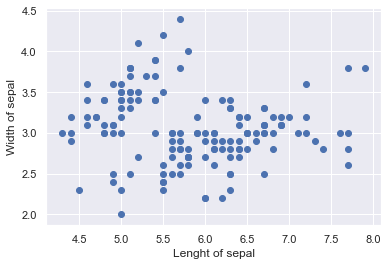

In [7]:
plt.scatter(iris_df['sepal length (cm)'],iris_df['sepal width (cm)'],cmap="Species")

# Name your axes
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

# Heat map

[]

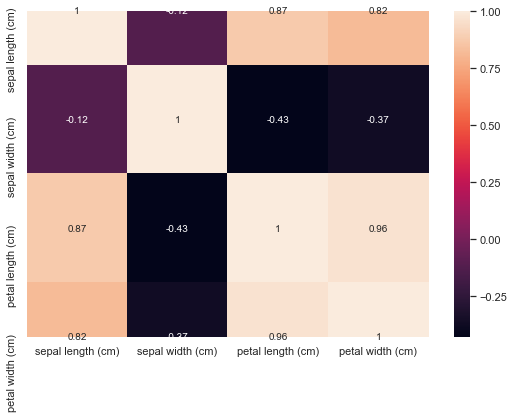

In [8]:
plt.figure(figsize=(9,6))
sns.heatmap(iris_df.corr(),annot=True)
plt.plot()

We can see that Sepal width and sepal length is slightly correlated with each other.

# Clustering (unscaled data)

Separate the original data into 2 clusters

In [9]:
from sklearn.cluster import KMeans

# create a variable which will contain the data for the clustering
x = iris_df.copy()
# create a k-means object with 2 clusters
kmeans = KMeans(2)
# fit the data
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
# create a copy of data, so we can see the clusters next to the original data
clusters = iris_df.copy()
# predict the cluster for each observation
clusters['cluster_pred']=kmeans.fit_predict(x)

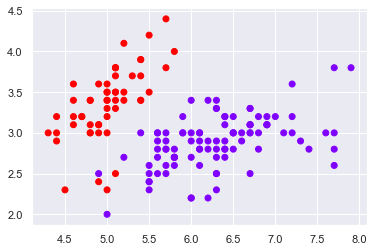

In [11]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(clusters['sepal length (cm)'], clusters['sepal width (cm)'], c= clusters ['cluster_pred'], cmap = 'rainbow')

# STANDARDARIZATION
Machine learning algorithms need to consider all features on an even playing field. That means the values for all features must be transformed to the same scale.

The process of transforming numerical features to use the same scale is known as feature scaling. It’s an important data preprocessing step for most distance-based machine learning algorithms because it can have a significant impact on the performance of your algorithm.

In [12]:
# import some preprocessing module
from sklearn import preprocessing

# scale the data for better results
x_scaled = preprocessing.scale(iris_df)
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [13]:
np.shape(x_scaled)

(150, 4)

# Clustering (scaled data)

In [14]:
# create a k-means object with 2 clusters
kmeans_scaled = KMeans(2)
# fit the data
kmeans_scaled.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
# create a copy of data, so we can see the clusters next to the original data
clusters_scaled = iris_df.copy()
# predict the cluster for each observation
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

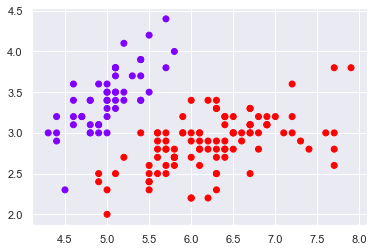

In [16]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(clusters_scaled['sepal length (cm)'], clusters_scaled['sepal width (cm)'], c= clusters_scaled ['cluster_pred'], cmap = 'rainbow')

How do you find the optimum number of clusters for K Means? How does one determine the value of K? We take advantage of the Elbow Method

# Within Cluster sum of squares (WCSS)
(the distances of each data point in all clusters to their respective centroids.)

sum of squared error (The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid.)

In [17]:
# WCSS
x = iris_df.iloc[:, [0, 1, 2, 3]].values
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state =0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [18]:
wcss

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.472230158730156,
 39.03998724608725,
 34.299712121212124,
 30.063110617452725,
 28.27172172856384,
 26.094324740540415]

# The Elbow Method

Implementing elbow method:

1-For each clusters k, calculate the total WSS(within-cluster sum of square)

2-Plotting the curve according to the number of clusters k.

3-The point where the line bend in the plot is considered as appropriate number of clusters.

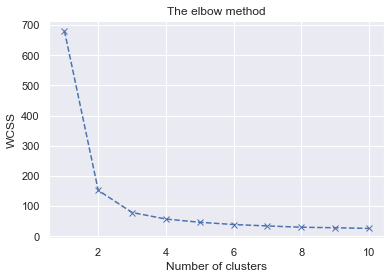

In [19]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss, 'bx--')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

As you can see, the optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph.

In [20]:
# For Verification,Identifying the k value. 
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

3

Kneelocator is used to identify the point of maximum curvature. This is essential to determine the number of clusters to form

# Fitting the data into K means clustering.

In [21]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", n_init = 10, max_iter = 300, random_state = 42)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [22]:
#Distance between points within the cluster. 
kmeans.inertia_

78.85144142614601

In [23]:
#Finding the enters of the clusters.
centroids = kmeans.cluster_centers_
centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [24]:
#Number of iterations run on the dataset. 
kmeans.n_iter_

3

In [25]:
#Predicted labels.
labels = kmeans.predict(x)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [26]:
#How the data points are categorized into clusters? (It shows how various points fall into different clusters)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

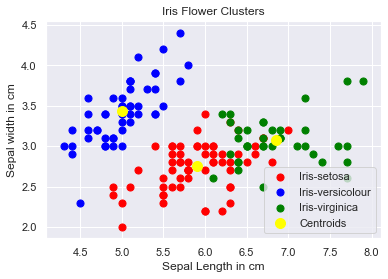

In [27]:
# Visualising the clusters

#Scatter plotting for (x,y) with label 1 as Cluster 1 in color c = red and points in size s = 50
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], s = 50, c = 'red', label = 'Iris-setosa')

#Scatter plotting for (x,y) with label 2 as Cluster 2 in color c = blue and points in size s = 50
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')

#Scatter plotting for (x,y) with label 3 as Cluster 3 in color c = green and points in size s = 50
plt.scatter(x[labels == 2, 0], x[labels == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Scatter plotting the centroids with label = 'Centroids' in color c = cyan and points in size s = 100
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Sepal width in cm')
plt.legend()
plt.show()

# Compare my solutions to the original iris dataset

The original (full) iris data is located in iris_with_answers.csv. Load the csv, plot the data and compare it with your solution.

Obviously there are only 3 species of Iris, because that's the original (truthful) iris dataset.

The 2-cluster solution seemed good, but in real life the iris dataset has 3 SPECIES (a 3-cluster solution). Therefore, clustering cannot be trusted at all times. Sometimes it seems like x clusters are a good solution, but in real life, there are more (or less).

In [28]:
real_data = pd.read_csv('iris_with_answers.csv')

In [29]:
real_data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [30]:
# We use the map function to change any 'yes' values to 1 and 'no'values to 0. 
real_data['species'] = real_data['species'].map({'setosa':0, 'versicolor':1 , 'virginica':2})

In [31]:
real_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Scatter plots (which we will use for comparison)

# 'Real data'

Looking at the first graph it seems like the clustering solution is much more intertwined than what we imagined

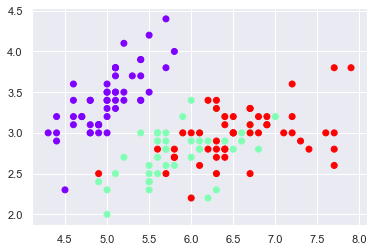

In [32]:
plt.scatter(real_data['sepal_length'], real_data['sepal_width'], c= real_data ['species'], cmap = 'rainbow')

Examining the other scatter plot (petal length vs petal width), we see that in fact the features which actually make the species different are petals and NOT sepals!

Note that 'real data' is the data observed in the real world (biological data)

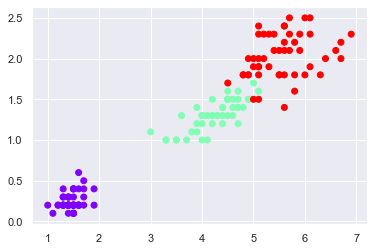

In [33]:
plt.scatter(real_data['petal_length'], real_data['petal_width'], c= real_data ['species'], cmap = 'rainbow')

# Our clustering solution data

It seems that our solution takes into account mainly the sepal features

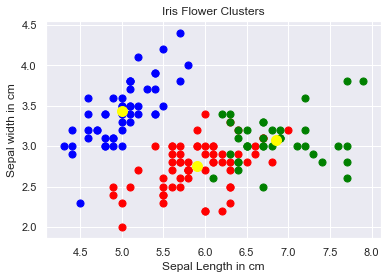

In [34]:
# Visualising the clusters

#Scatter plotting for (x,y) with label 1 as Cluster 1 in color c = red and points in size s = 50
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], s = 50, c = 'red', label = 'Iris-setosa')

#Scatter plotting for (x,y) with label 2 as Cluster 2 in color c = blue and points in size s = 50
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')

#Scatter plotting for (x,y) with label 3 as Cluster 3 in color c = green and points in size s = 50
plt.scatter(x[labels == 2, 0], x[labels == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Scatter plotting the centroids with label = 'Centroids' in color c = cyan and points in size s = 100
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Sepal width in cm')

plt.show()

# Comparison between Actual And Predicted Solution

In [35]:
y = real_data['species']

In [36]:
# Encode for string labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder().fit(y)
y = label_encoder.transform(y)

Text(0.5, 1.0, 'Predicted')

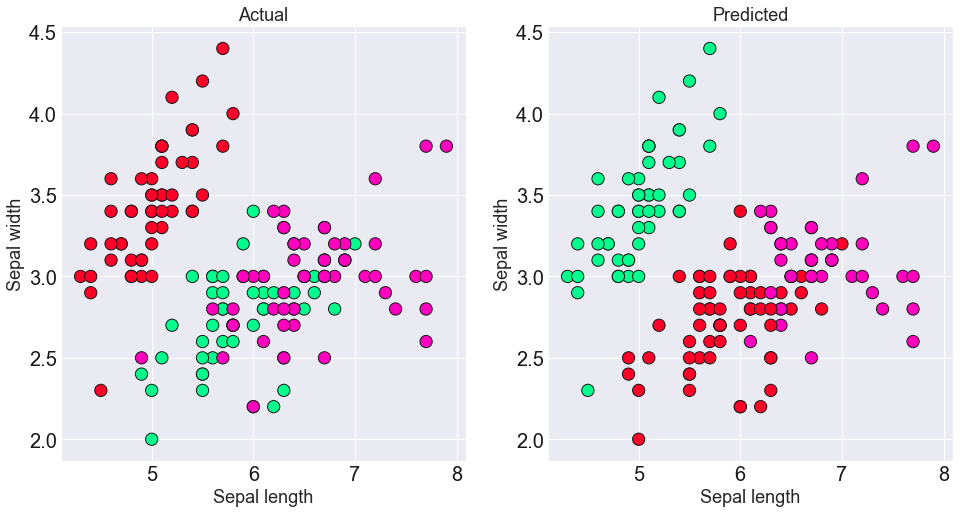

In [37]:
new_labels = kmeans.labels_
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(x[:, 0], x[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(x[:, 0], x[:, 1], c=new_labels, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

# CONCLUSION : From the given ‘Iris’ dataset, predict the optimum number of clusters predicted and represented visually.